In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="darkgrid")

## Grafico de dispercion

In [2]:
tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


#### Creacion:
creamos un grafico de dispercion de dos variables
sns.relplot (x=[nombre_columna], y=[nombre_columna], data = [dataFrame]

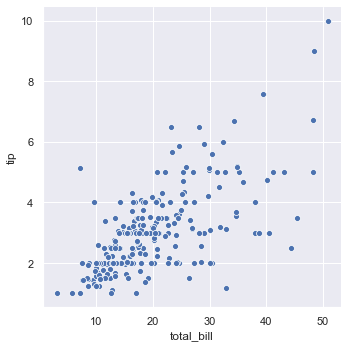

In [3]:
sns.relplot(x="total_bill", y="tip", data=tips)

creamos un grafico de dispercion de 3 varibles añadiendo el atributo hue:
- sns.relplot(x = total_bill,y = tip, *hue = sex*, data = tips)



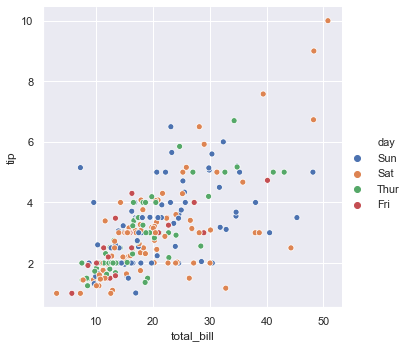

In [4]:
sns.relplot(x = "total_bill",y = "tip", hue = "day", data = tips) #hue añade diferenciacion por color 

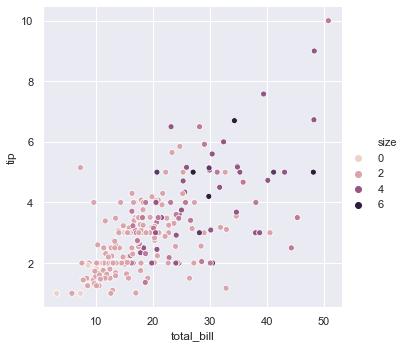

In [5]:
sns.relplot(x = "total_bill",y = "tip", hue = "size", data = tips) #si el atributo hue es numerico se crea una escala de colores

##### creamos diferenciacion por tamaños 
usamos el atributo size = "nombre_columna"

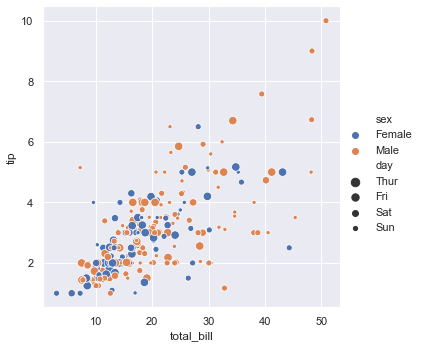

In [6]:
sns.relplot(x="total_bill", y = "tip", size="day", hue="sex",data =tips)

##### cambiamos el tamaño de los puntos creados por size
usando el atributo ----> sizes=([relacion_tamaño],[tamaño])

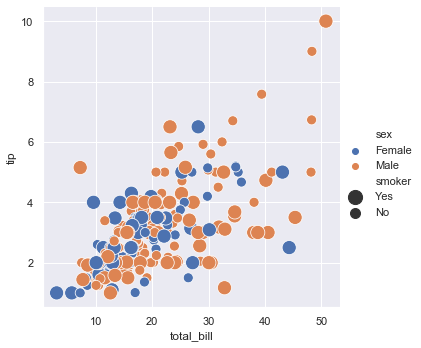

In [7]:
sns.relplot(x="total_bill", y = "tip", size="smoker", sizes=(100,200),hue="sex",data =tips)

##  grafico de lineas
podemos ajustar el tipo de grafica con la funcion ------> kind = "line"
para hacer un grafico lineal

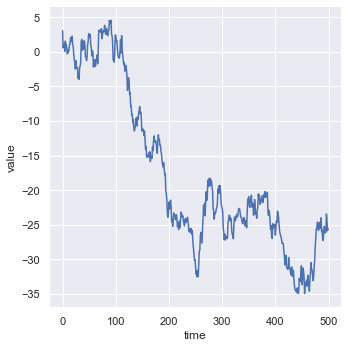

In [8]:
df = pd.DataFrame({"time" : np.arange(500),"value" : np.random.randn(500).cumsum()})
g = sns.relplot(x="time",y="value", kind="line", data = df)

In [9]:
data = sns.load_dataset("fmri")
print(data)

     subject  timepoint event    region    signal
0        s13         18  stim  parietal -0.017552
1         s5         14  stim  parietal -0.080883
2        s12         18  stim  parietal -0.081033
3        s11         18  stim  parietal -0.046134
4        s10         18  stim  parietal -0.037970
...      ...        ...   ...       ...       ...
1059      s0          8   cue   frontal  0.018165
1060     s13          7   cue   frontal -0.029130
1061     s12          7   cue   frontal -0.004939
1062     s11          7   cue   frontal -0.025367
1063      s0          0   cue  parietal -0.006899

[1064 rows x 5 columns]


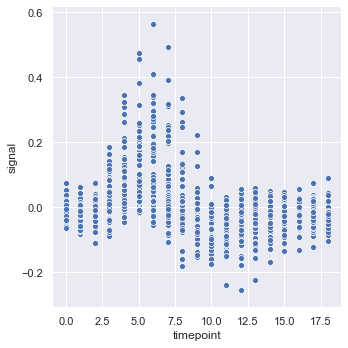

In [10]:
sns.relplot(x="timepoint",y="signal",data = data)

#### como hay data sets con multiples valores para cada muestra, seaborn toma la medie y el 95% de los datos mas confiables para graficar de froma automatica

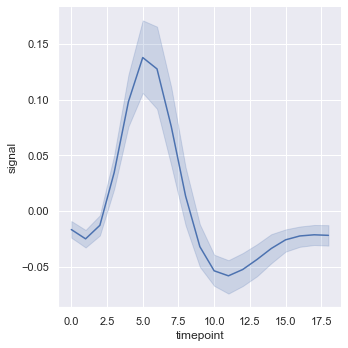

In [11]:
sns.relplot(x="timepoint",y="signal",kind="line",data = data)

##### este estandar de estimacion "CI" lo podemos camviar por la desviacion estandar o incuso desactivarlo

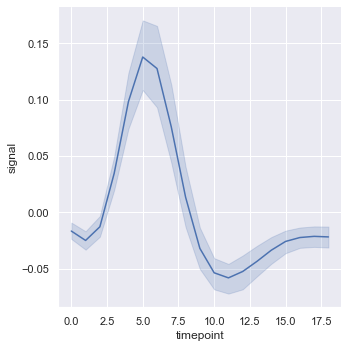

In [12]:
sns.relplot(x="timepoint",y="signal",kind="line",data = data) #tomamos la desviacion estandar y la linea es la media

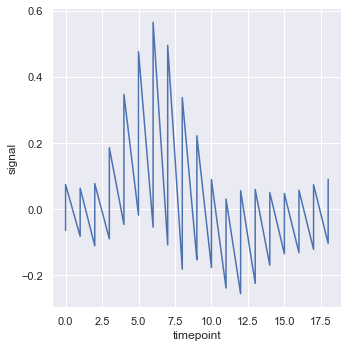

In [13]:
sns.relplot(x="timepoint",y="signal",kind="line",estimator = None,data = data) #desactivamos todo y solo ponemos los datos

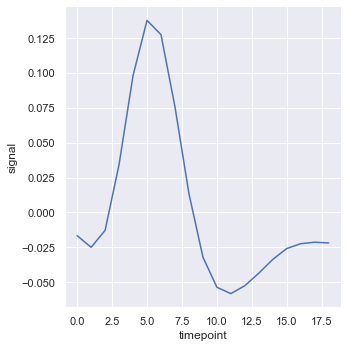

In [14]:
sns.relplot(x="timepoint",y="signal",kind="line", ci = None,data = data) #desactivar que tome la media

#### añadir una tercera variable
al igual que los graficos de dispercion tambien se puede añadir otra variable 

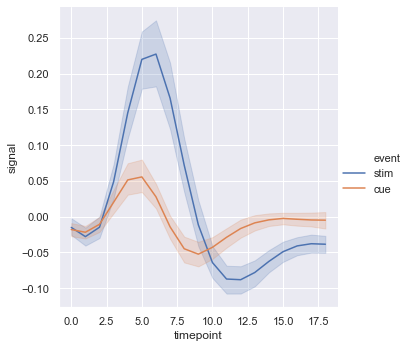

In [15]:
sns.relplot(x="timepoint",y="signal",kind="line", hue="event" ,data = data) #hue = "nombre_columna"

e incluso añadir otra variable con style = "nobre_columna", markers = Trues

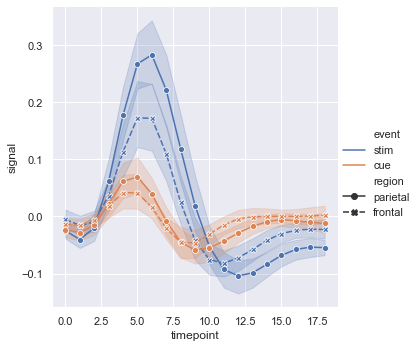

In [16]:
sns.relplot(x="timepoint",y="signal",kind="line", hue="event" ,style="region", markers = True,data = data) #style = "nombre_columna"

Tambien le podemos agragar el atributo tamaño

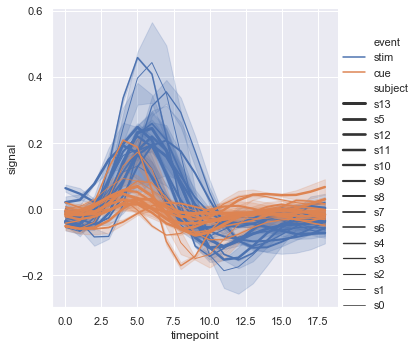

In [17]:
sns.relplot(x="timepoint",y="signal",kind="line", hue="event" ,size = "subject", markers = True,data = data) #size = "nombre_columna"

#### Podemos añadir fechas al grafico
grf.fig.autofmt_xdate()

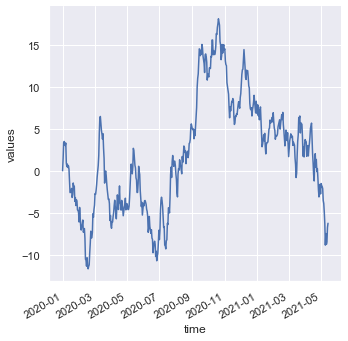

In [55]:
df = pd.DataFrame(dict(time=pd.date_range("2020-01-01", periods = 500),values = np.random.randn(500).cumsum()))
grf = sns.relplot(x = "time", y = "values",kind ="line", data = df)
grf.fig.autofmt_xdate() #con este comando le damos el fomarto tiempo

#### Agrgar mas de una grafica
col = "nomobre_columna"

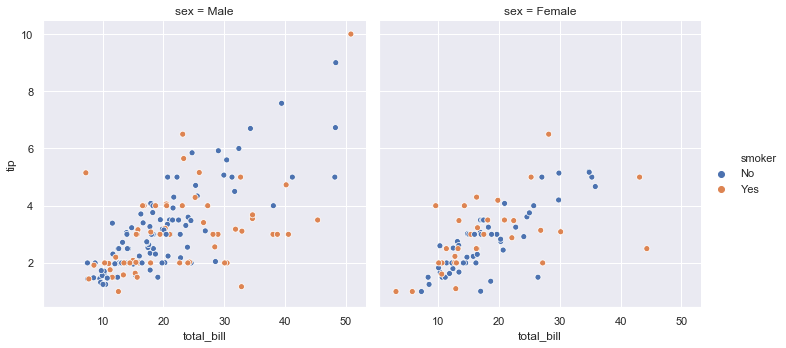

In [19]:
sns.relplot(x="total_bill", y="tip", hue="smoker",col = "sex", data=tips);

Agragar mas relaciones 

In [20]:
fmri = sns.load_dataset("fmri")
print(fmri)

     subject  timepoint event    region    signal
0        s13         18  stim  parietal -0.017552
1         s5         14  stim  parietal -0.080883
2        s12         18  stim  parietal -0.081033
3        s11         18  stim  parietal -0.046134
4        s10         18  stim  parietal -0.037970
...      ...        ...   ...       ...       ...
1059      s0          8   cue   frontal  0.018165
1060     s13          7   cue   frontal -0.029130
1061     s12          7   cue   frontal -0.004939
1062     s11          7   cue   frontal -0.025367
1063      s0          0   cue  parietal -0.006899

[1064 rows x 5 columns]


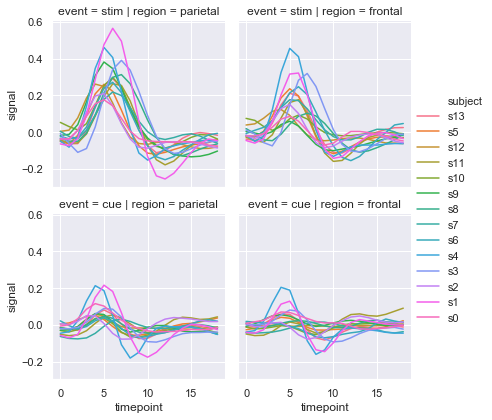

In [21]:
sns.relplot(x="timepoint", y = "signal", hue="subject",kind="line",col="region",row = "event",height = 3,estimator = None,data = fmri)

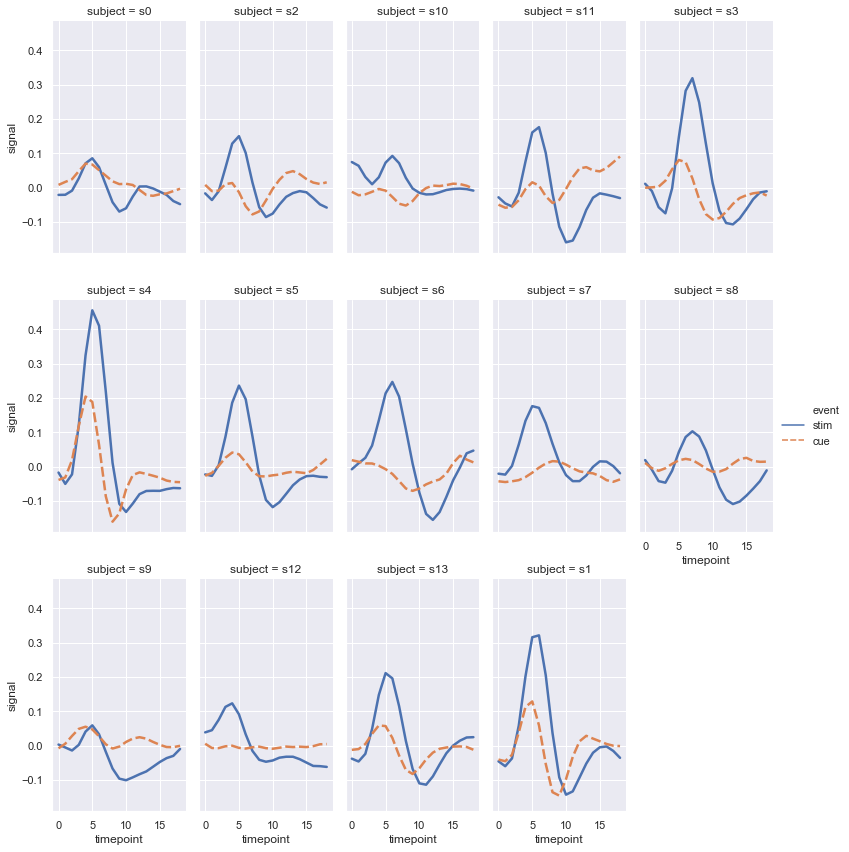

In [22]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=4, aspect=.55, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

##### EN GENERAL
sns.relplot(x="timepoint", y="signal", hue="event", style="event",col="subject", col_wrap=5, height=3, aspect=.75, linewidth=2.5, kind="line", data=fmri.query("region == 'frontal'"));
- x = [nombre_columna]         
- y = [nombre_columna]    
- hue = [nombre_columna]    ----> da color
- style = [nombre_columna]    ----> da style
- col = [nombre_columna] ----->divide en distintas graficas dependiendo del numero de columnas



# Tabjando con datos categoricos
##### catplot()

In [28]:
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


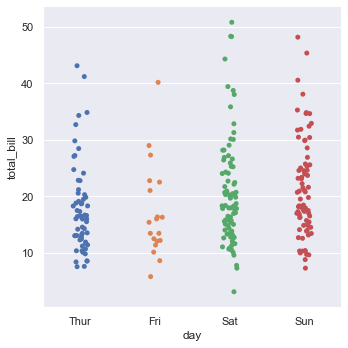

In [24]:
sns.catplot(x="day",y="total_bill",data=tips)

##### Para asegurar que un punto no sobreponga a otro usamos -----------> kind="swarm"

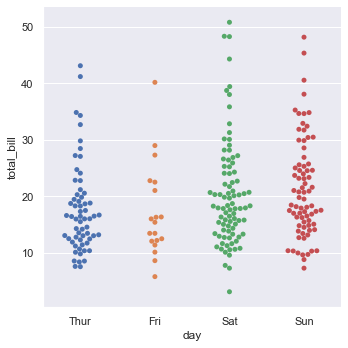

In [25]:
sns.catplot(x="day",y="total_bill",kind="swarm",data=tips)

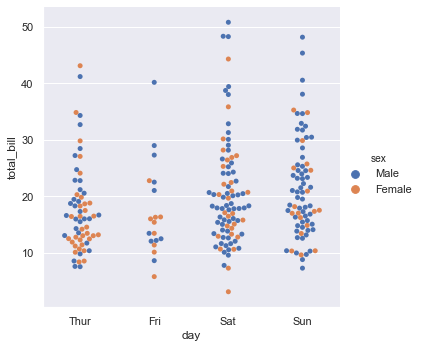

In [29]:
sns.catplot(x="day",y="total_bill",hue="sex",kind="swarm",data=tips)

##### SI queremos no mostrar alguna de las muestras usamos data.query(condicion)

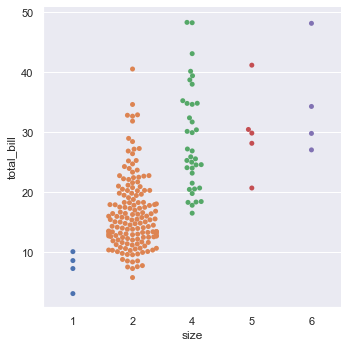

In [33]:
sns.catplot(x="size", y="total_bill", kind="swarm", data=tips.query("size != 3"))

##### otra manera de organizar como los datos son organizados 
añadir el atibuto -------------> order=["nombre_registro","nombre_registro2"]

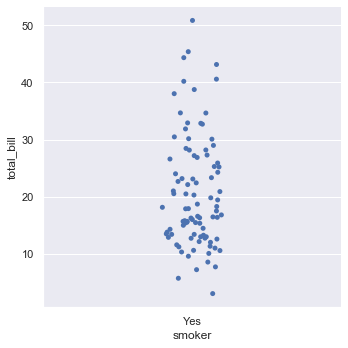

In [36]:
sns.catplot(x="smoker",y="total_bill",order = ["Yes"],data=tips) # order = ["atr1","atr2"]

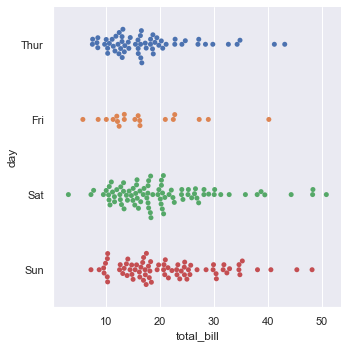

In [39]:
sns.catplot(x="total_bill",y="day",kind="swarm",data=tips)

# Bar plots
catplot(..... ,kind="bar",....)

In [40]:
titanic = sns.load_dataset("titanic")
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

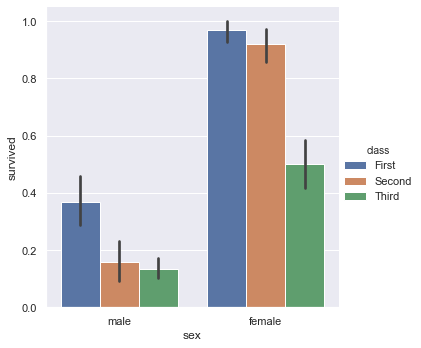

In [45]:
sns.catplot(x= "sex",y= "survived",kind="bar",hue="class",data = titanic)

#### podemos contar el numero de apariciones de una variable
sns.catplot(x="...",kind="count",....)

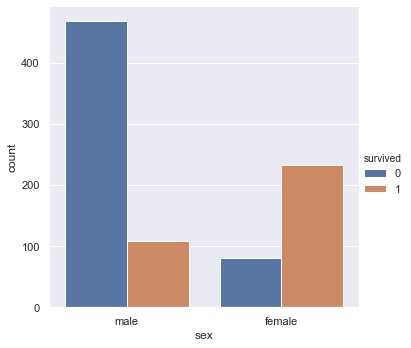

In [49]:
sns.catplot(x="sex",kind="count",hue="survived",data= titanic)

#### podemos dividir los graficos en varios tipos

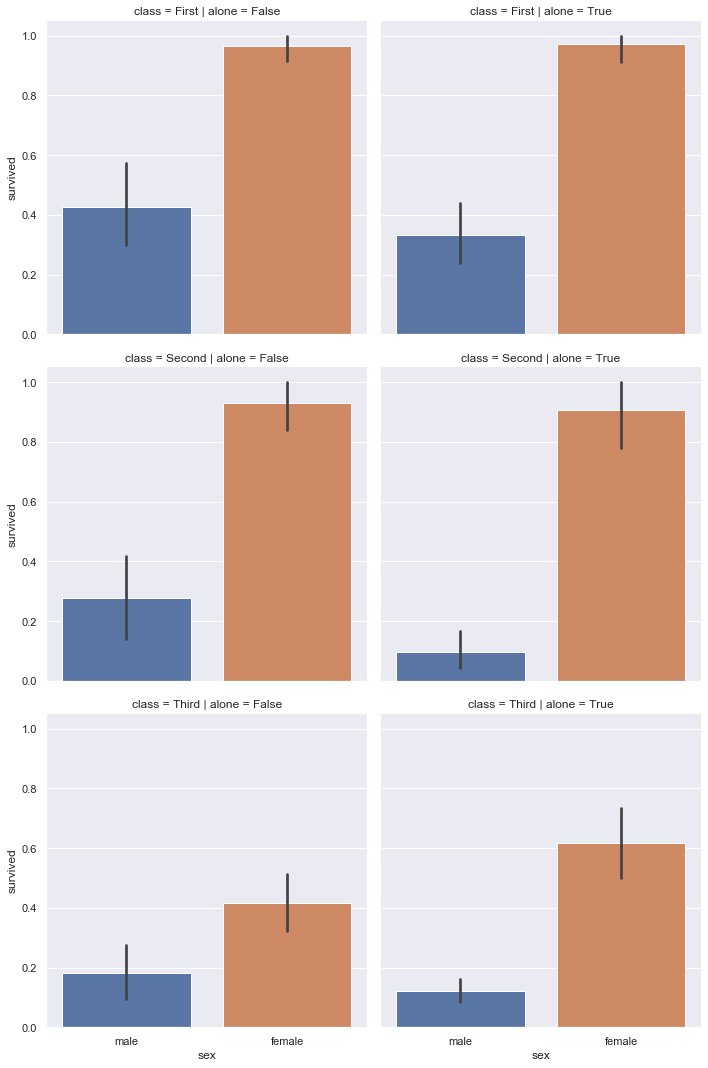

In [66]:
sns.catplot(y="survived",x="sex",col="alone",row= "class",kind="bar",data=titanic)

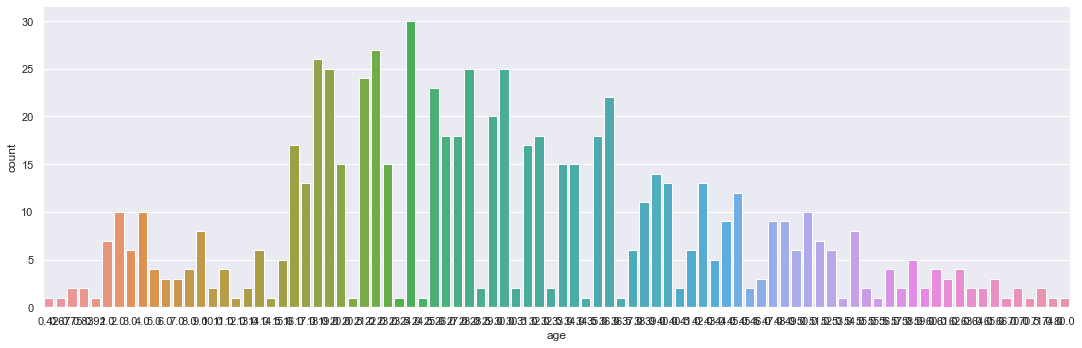

In [65]:
sns.catplot(x="age",kind="count",data=titanic,aspect=3)

# Crear heat maps
- x = np array
- annot- mostrar los valores de los graficos
- cbar = False - no muesta la barra lateral
- vmin / vmax - valores minimos y maximos


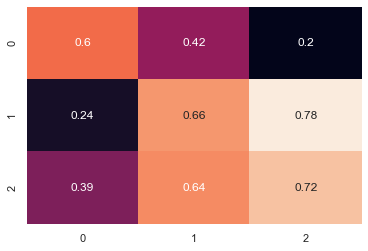

In [9]:
x = np.random.rand(3,3)
sns.heatmap(x, annot = True, cbar = False)